# Online Payments Fraud Detection

In [1]:
#Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

#Set to display all the columns in datset

pd.set_option("display.max_columns",None)
 
#To run sql queries on data frame
import pandasql as psql

In [2]:
#Load the Dataset

OPFD_Data = pd.read_csv(r"/Users/killamsettysuneel/Desktop/internship/Online_Payments_Fraud_Detection_Project.csv",header=0)

#Creating the backup file to the dataset

OPFD_Data_BK = OPFD_Data.copy()

#Display the first 5 records

OPFD_Data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
#Display the dataset Information

OPFD_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
#Display the size of the Dataset

OPFD_Data.shape

(6362620, 11)

In [5]:
#Display the duplicate values

OPFD_Data_dup = OPFD_Data[OPFD_Data.duplicated(keep='last')]
OPFD_Data_dup

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [6]:
#Checking the missing values in the dataset

OPFD_Data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
#Checking the duplicate values in the dataset

OPFD_Data.duplicated().any()

False

In [8]:
#Display the unique values of all the variables 

OPFD_Data.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [9]:
#Display the unique values by count for 'type'

OPFD_Data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [10]:
#Use LableEncoder for 'type' variables

from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
OPFD_Data['type'] = LE.fit_transform(OPFD_Data['type'])

In [11]:
#Display the unique values by count for 'isFraud'

OPFD_Data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [12]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

isFraud_count = OPFD_Data.isFraud.value_counts()
print('Class 0:', isFraud_count[0])
print('Class 1:', isFraud_count[1])
print('Proportion:', round(isFraud_count[0] / isFraud_count[1], 2), ': 1')
print('Total Bank records:', len(OPFD_Data))

Class 0: 6354407
Class 1: 8213
Proportion: 773.7 : 1
Total Bank records: 6362620


In [13]:
#Splitting the dataset on basis of isFraud value

q1=psql.sqldf('select * from OPFD_Data where isFraud=1')
q2=psql.sqldf('select * from OPFD_Data where isFraud=0')

In [14]:
#Taking the 10% of the non-fradulent data

q3=q2.groupby('isFraud',group_keys=False).apply(lambda x:x.sample(frac=0.012))

In [15]:
#Merging both q1 and q3 dataframe

OPFD_Data=pd.concat([q1,q3])

In [16]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

isFraud_count = OPFD_Data.isFraud.value_counts()
print('Class 0:', isFraud_count[0])
print('Class 1:', isFraud_count[1])
print('Proportion:', round(isFraud_count[0] / isFraud_count[1], 2), ': 1')
print('Total Bank records:', len(OPFD_Data))

Class 0: 76253
Class 1: 8213
Proportion: 9.28 : 1
Total Bank records: 84466


In [17]:
# Identifying variables for scalling

OPFD_Data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [18]:
# Delete the unnamed column and variables which are not impacting the target variable

OPFD_Data = OPFD_Data.drop(['step','nameOrig','nameDest','isFlaggedFraud'],axis=1)
OPFD_Data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,4,181.0,181.0,0.0,0.0,0.0,1
1,1,181.0,181.0,0.0,21182.0,0.0,1
2,4,2806.0,2806.0,0.0,0.0,0.0,1
3,1,2806.0,2806.0,0.0,26202.0,0.0,1
4,4,20128.0,20128.0,0.0,0.0,0.0,1


In [19]:
#Display the Descriptive statistics

OPFD_Data.describe()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,84466.000000,8.446600e+04,8.446600e+04,8.446600e+04,8.446600e+04,8.446600e+04,84466.000000
mean,1.791597,3.036406e+05,9.124407e+05,7.913332e+05,1.049434e+06,1.232957e+06,0.097234
std,1.386032,1.024517e+06,2.977248e+06,2.862122e+06,3.477230e+06,3.771796e+06,0.296278
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,1.000000,1.514878e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,1.000000,8.930042e+04,2.095750e+04,0.000000e+00,8.943829e+04,1.974132e+05,0.000000
75%,3.000000,2.389686e+05,1.850363e+05,1.053774e+05,8.606178e+05,1.112052e+06,0.000000
max,4.000000,7.382349e+07,5.958504e+07,4.958504e+07,2.362305e+08,2.367265e+08,1.000000


In [20]:
#Identifying Independent and Target(dependent) variables

IndepVar = []
for col in OPFD_Data.columns:
    if col != 'isFraud':
        IndepVar.append(col)
        
TargetVar = 'isFraud'

x = OPFD_Data[IndepVar]
y = OPFD_Data[TargetVar]

In [21]:
# split the data into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape    

((59126, 6), (25340, 6), (59126,), (25340,))

In [22]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

# KNN Algorithm

In [23]:
#Load the KNN dataset

KNN_Results = pd.read_csv(r"/Users/killamsettysuneel/Desktop/internship/KNN_results.csv",header=0)

#Display first 5 Records

KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[ 1011  1436]
 [   79 22814]]
Outcome values : 
 1011 1436 79 22814
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.41      0.57      2447
           0       0.94      1.00      0.97     22893

    accuracy                           0.94     25340
   macro avg       0.93      0.70      0.77     25340
weighted avg       0.94      0.94      0.93     25340

Accuracy : 94.0 %
Precision : 92.8 %
Recall : 41.3 %
F1 Score : 0.572
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 70.5 %
MCC : 0
roc_auc_score: 0.705


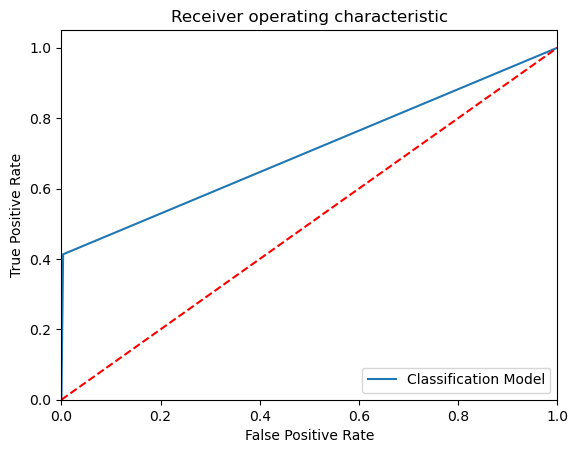

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 1005  1442]
 [   49 22844]]
Outcome values : 
 1005 1442 49 22844
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.41      0.57      2447
           0       0.94      1.00      0.97     22893

    accuracy                           0.94     25340
   macro avg       0.95      0.70      0.77     25340
weighted avg       0.94      0.94      0.93     25340

Accuracy : 94.1 %
Precision : 95.4 %
Recall : 41.1 %
F1 Score : 0.574
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 70.4 %
MCC : 0
roc_auc_score: 0.704


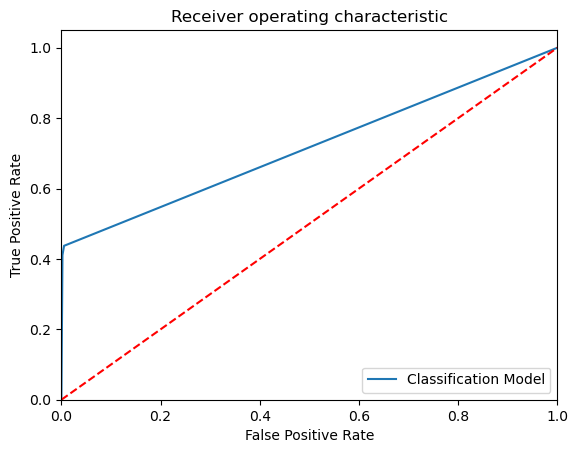

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[ 1062  1385]
 [   64 22829]]
Outcome values : 
 1062 1385 64 22829
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.43      0.59      2447
           0       0.94      1.00      0.97     22893

    accuracy                           0.94     25340
   macro avg       0.94      0.72      0.78     25340
weighted avg       0.94      0.94      0.93     25340

Accuracy : 94.3 %
Precision : 94.3 %
Recall : 43.4 %
F1 Score : 0.594
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 71.6 %
MCC : 0
roc_auc_score: 0.716


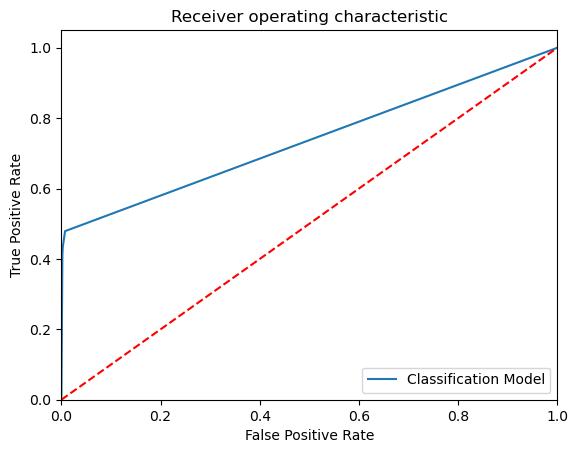

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[ 1058  1389]
 [   55 22838]]
Outcome values : 
 1058 1389 55 22838
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.43      0.59      2447
           0       0.94      1.00      0.97     22893

    accuracy                           0.94     25340
   macro avg       0.95      0.71      0.78     25340
weighted avg       0.94      0.94      0.93     25340

Accuracy : 94.3 %
Precision : 95.1 %
Recall : 43.2 %
F1 Score : 0.594
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 71.5 %
MCC : 0
roc_auc_score: 0.715


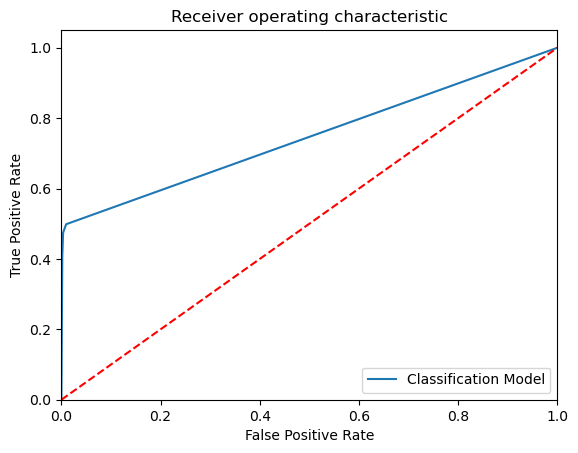

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[ 1157  1290]
 [   68 22825]]
Outcome values : 
 1157 1290 68 22825
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.47      0.63      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.95      0.73      0.80     25340
weighted avg       0.95      0.95      0.94     25340

Accuracy : 94.6 %
Precision : 94.4 %
Recall : 47.3 %
F1 Score : 0.63
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 73.5 %
MCC : 0
roc_auc_score: 0.735


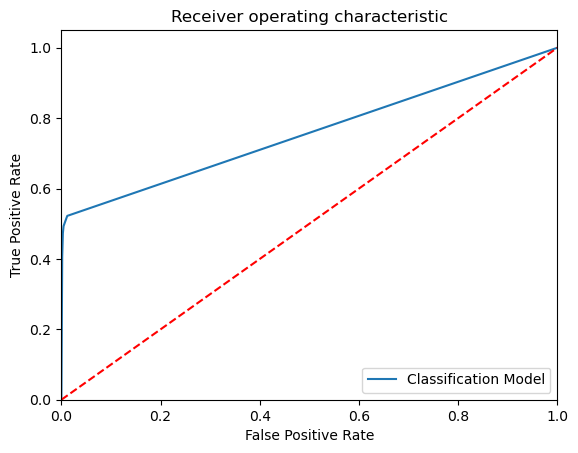

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[ 1149  1298]
 [   57 22836]]
Outcome values : 
 1149 1298 57 22836
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.47      0.63      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.95      0.73      0.80     25340
weighted avg       0.95      0.95      0.94     25340

Accuracy : 94.7 %
Precision : 95.3 %
Recall : 47.0 %
F1 Score : 0.629
Specificity or True Negative Rate : 99.8 %
Balanced Accuracy : 73.4 %
MCC : 0
roc_auc_score: 0.734


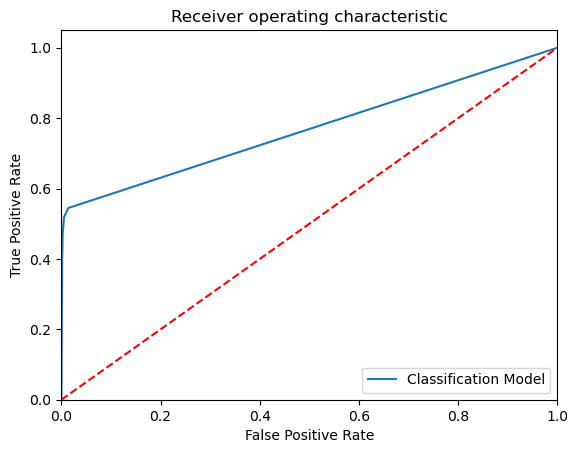

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[ 1194  1253]
 [   69 22824]]
Outcome values : 
 1194 1253 69 22824
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.49      0.64      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.95      0.74      0.81     25340
weighted avg       0.95      0.95      0.94     25340

Accuracy : 94.8 %
Precision : 94.5 %
Recall : 48.8 %
F1 Score : 0.644
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 74.2 %
MCC : 0
roc_auc_score: 0.742


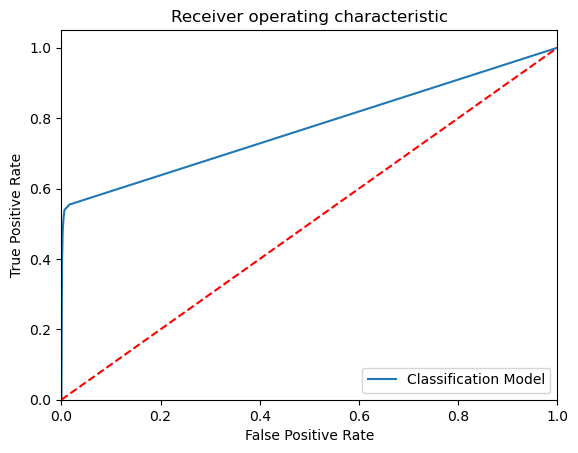

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[ 1193  1254]
 [   67 22826]]
Outcome values : 
 1193 1254 67 22826
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.49      0.64      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.95      0.74      0.81     25340
weighted avg       0.95      0.95      0.94     25340

Accuracy : 94.8 %
Precision : 94.7 %
Recall : 48.8 %
F1 Score : 0.644
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 74.2 %
MCC : 0
roc_auc_score: 0.742


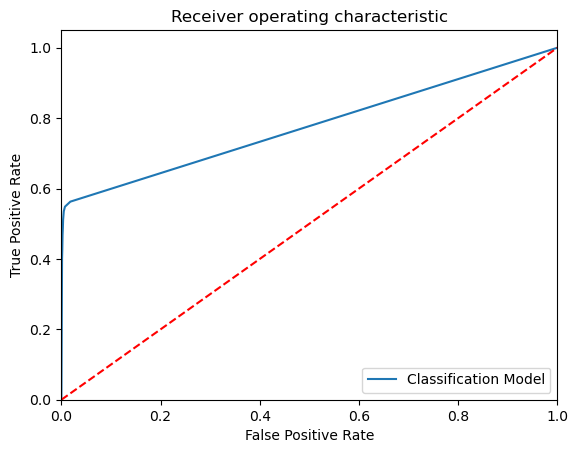

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[ 1250  1197]
 [   75 22818]]
Outcome values : 
 1250 1197 75 22818
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.51      0.66      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.95      0.75      0.82     25340
weighted avg       0.95      0.95      0.94     25340

Accuracy : 95.0 %
Precision : 94.3 %
Recall : 51.1 %
F1 Score : 0.663
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 75.4 %
MCC : 0
roc_auc_score: 0.754


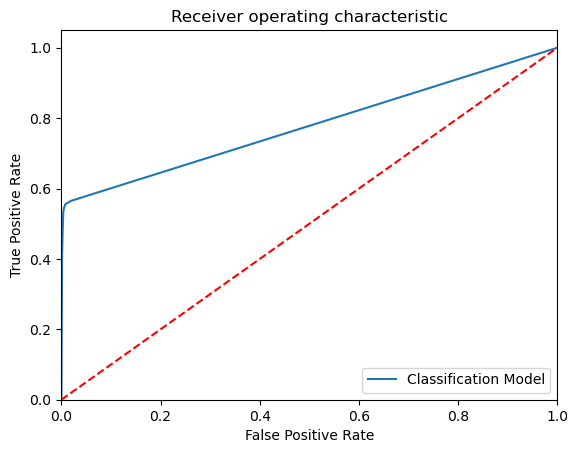

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[ 1248  1199]
 [   71 22822]]
Outcome values : 
 1248 1199 71 22822
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.51      0.66      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.95      0.75      0.82     25340
weighted avg       0.95      0.95      0.94     25340

Accuracy : 95.0 %
Precision : 94.6 %
Recall : 51.0 %
F1 Score : 0.663
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 75.4 %
MCC : 0
roc_auc_score: 0.753


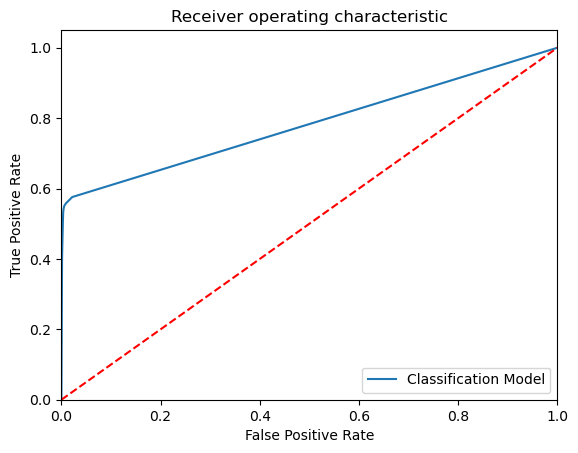

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[ 1301  1146]
 [   78 22815]]
Outcome values : 
 1301 1146 78 22815
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.53      0.68      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.95      0.76      0.83     25340
weighted avg       0.95      0.95      0.95     25340

Accuracy : 95.2 %
Precision : 94.3 %
Recall : 53.2 %
F1 Score : 0.68
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 76.4 %
MCC : 0
roc_auc_score: 0.764


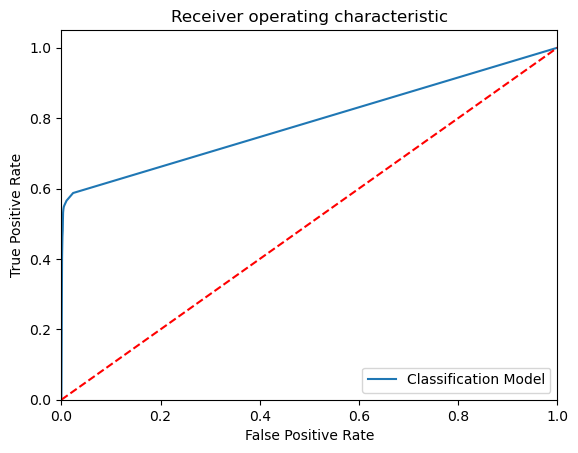

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[ 1295  1152]
 [   75 22818]]
Outcome values : 
 1295 1152 75 22818
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.53      0.68      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.95      0.76      0.83     25340
weighted avg       0.95      0.95      0.95     25340

Accuracy : 95.2 %
Precision : 94.5 %
Recall : 52.9 %
F1 Score : 0.679
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 76.3 %
MCC : 0
roc_auc_score: 0.763


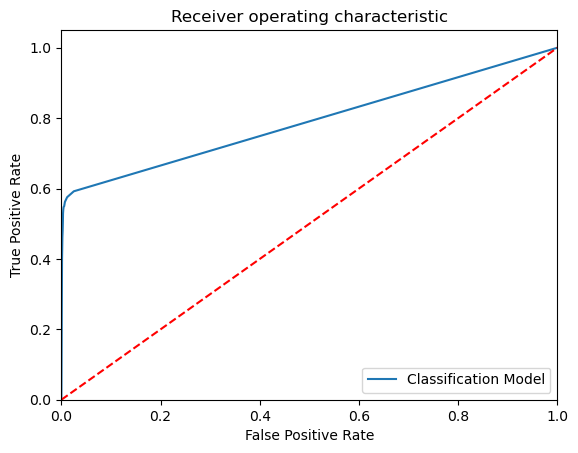

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[ 1316  1131]
 [   82 22811]]
Outcome values : 
 1316 1131 82 22811
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.54      0.68      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.95      0.77      0.83     25340
weighted avg       0.95      0.95      0.95     25340

Accuracy : 95.2 %
Precision : 94.1 %
Recall : 53.8 %
F1 Score : 0.685
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 76.7 %
MCC : 0
roc_auc_score: 0.767


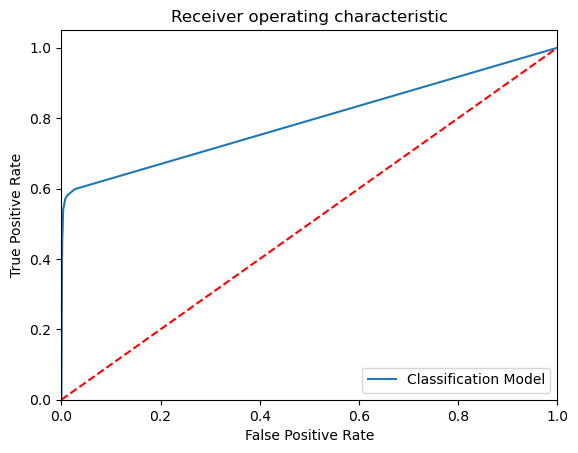

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[ 1312  1135]
 [   80 22813]]
Outcome values : 
 1312 1135 80 22813
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.54      0.68      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.95      0.77      0.83     25340
weighted avg       0.95      0.95      0.95     25340

Accuracy : 95.2 %
Precision : 94.3 %
Recall : 53.6 %
F1 Score : 0.684
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 76.6 %
MCC : 0
roc_auc_score: 0.766


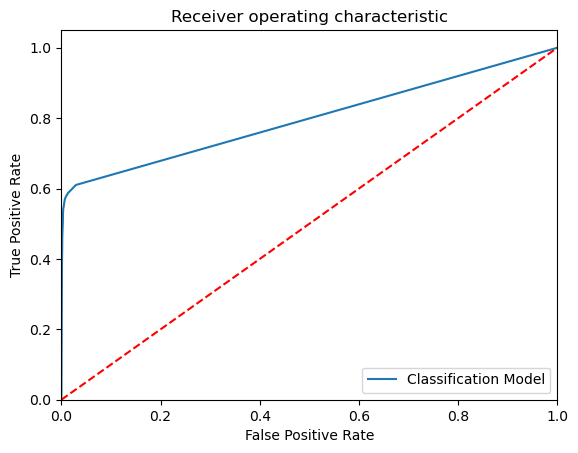

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[ 1326  1121]
 [   85 22808]]
Outcome values : 
 1326 1121 85 22808
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.54      0.69      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.95      0.77      0.83     25340
weighted avg       0.95      0.95      0.95     25340

Accuracy : 95.2 %
Precision : 94.0 %
Recall : 54.2 %
F1 Score : 0.687
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 76.9 %
MCC : 0
roc_auc_score: 0.769


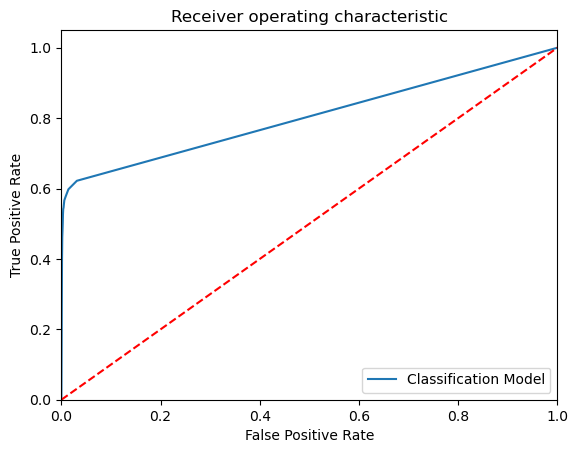

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[ 1326  1121]
 [   84 22809]]
Outcome values : 
 1326 1121 84 22809
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.54      0.69      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.95      0.77      0.83     25340
weighted avg       0.95      0.95      0.95     25340

Accuracy : 95.2 %
Precision : 94.0 %
Recall : 54.2 %
F1 Score : 0.688
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 76.9 %
MCC : 0
roc_auc_score: 0.769


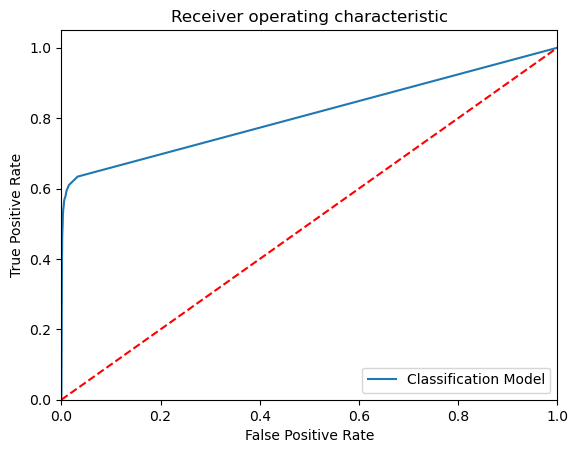

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[ 1330  1117]
 [   94 22799]]
Outcome values : 
 1330 1117 94 22799
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.54      0.69      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.94      0.77      0.83     25340
weighted avg       0.95      0.95      0.95     25340

Accuracy : 95.2 %
Precision : 93.4 %
Recall : 54.4 %
F1 Score : 0.687
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 77.0 %
MCC : 0
roc_auc_score: 0.77


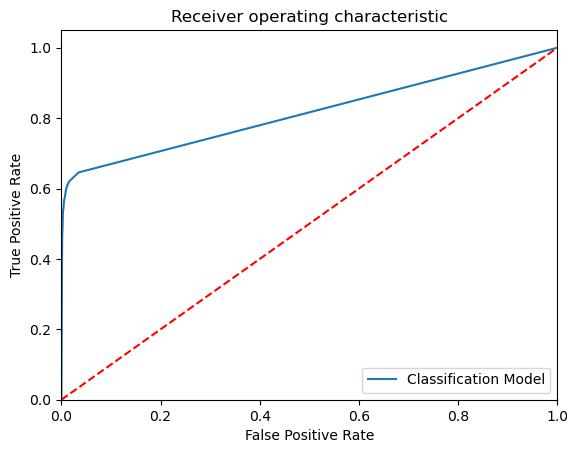

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[ 1327  1120]
 [   93 22800]]
Outcome values : 
 1327 1120 93 22800
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.54      0.69      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.94      0.77      0.83     25340
weighted avg       0.95      0.95      0.95     25340

Accuracy : 95.2 %
Precision : 93.5 %
Recall : 54.2 %
F1 Score : 0.686
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 76.9 %
MCC : 0
roc_auc_score: 0.769


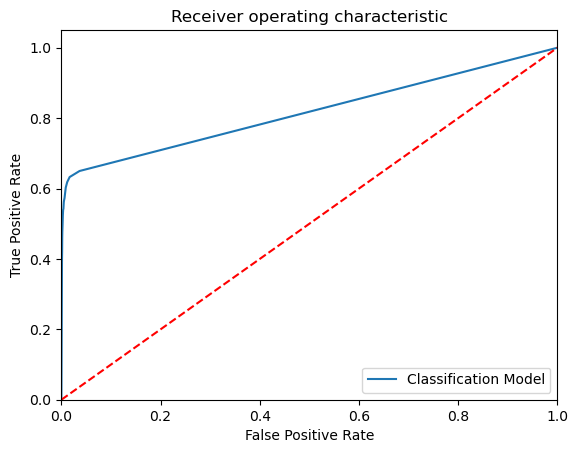

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[ 1347  1100]
 [   97 22796]]
Outcome values : 
 1347 1100 97 22796
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.55      0.69      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.94      0.77      0.83     25340
weighted avg       0.95      0.95      0.95     25340

Accuracy : 95.3 %
Precision : 93.3 %
Recall : 55.0 %
F1 Score : 0.692
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 77.3 %
MCC : 0
roc_auc_score: 0.773


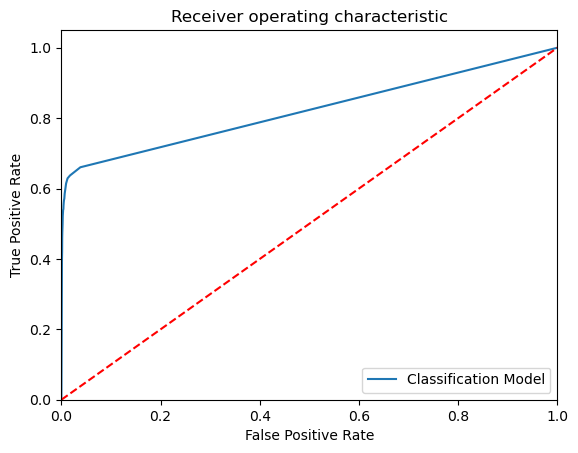

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[ 1347  1100]
 [   96 22797]]
Outcome values : 
 1347 1100 96 22797
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.55      0.69      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.94      0.77      0.83     25340
weighted avg       0.95      0.95      0.95     25340

Accuracy : 95.3 %
Precision : 93.3 %
Recall : 55.0 %
F1 Score : 0.693
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 77.3 %
MCC : 0
roc_auc_score: 0.773


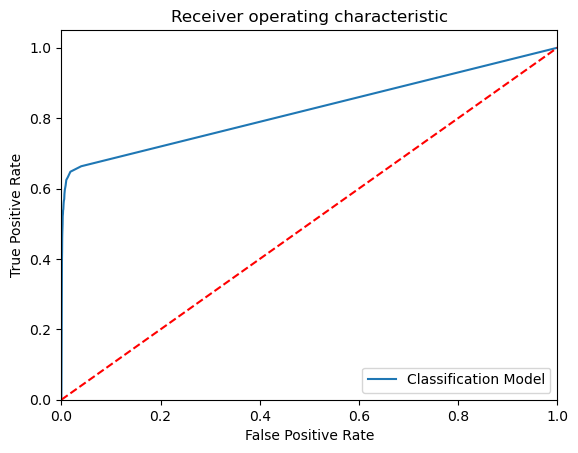

In [24]:
# Build KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    #mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    #MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    MCC = 0
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------

In [25]:
KNN_Results.head(20)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,1011,1436,79,22814,0.940,0.928,0.413,0.572,0.997,0,0.704854,0.705
1,KNeighborsClassifier(n_neighbors=2),2,1005,1442,49,22844,0.941,0.954,0.411,0.574,0.998,0,0.704283,0.704
2,KNeighborsClassifier(n_neighbors=3),3,1062,1385,64,22829,0.943,0.943,0.434,0.594,0.997,0,0.715603,0.716
3,KNeighborsClassifier(n_neighbors=4),4,1058,1389,55,22838,0.943,0.951,0.432,0.594,0.998,0,0.714982,0.715
4,KNeighborsClassifier(),5,1157,1290,68,22825,0.946,0.944,0.473,0.630,0.997,0,0.734927,0.735
5,KNeighborsClassifier(n_neighbors=6),6,1149,1298,57,22836,0.947,0.953,0.470,0.629,0.998,0,0.733532,0.734
6,KNeighborsClassifier(n_neighbors=7),7,1194,1253,69,22824,0.948,0.945,0.488,0.644,0.997,0,0.742465,0.742
7,KNeighborsClassifier(n_neighbors=8),8,1193,1254,67,22826,0.948,0.947,0.488,0.644,0.997,0,0.742305,0.742
8,KNeighborsClassifier(n_neighbors=9),9,1250,1197,75,22818,0.950,0.943,0.511,0.663,0.997,0,0.753777,0.754
9,KNeighborsClassifier(n_neighbors=10),10,1248,1199,71,22822,0.950,0.946,0.510,0.663,0.997,0,0.753455,0.754


In [26]:
#Load the dataset

EMResults1 = pd.read_csv(r"/Users/killamsettysuneel/Desktop/internship/EMResults.csv",header=0)

#Display first 5 Records

EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# SVM - Linear Kernel

Model Name:  SVM - Linear
Confusion matrix : 
 [[  720  1727]
 [   27 22866]]
Outcome values : 
 720 1727 27 22866
Classification report : 
               precision    recall  f1-score   support

           1       0.96      0.29      0.45      2447
           0       0.93      1.00      0.96     22893

    accuracy                           0.93     25340
   macro avg       0.95      0.65      0.71     25340
weighted avg       0.93      0.93      0.91     25340

Accuracy : 93.1 %
Precision : 96.4 %
Recall : 29.4 %
F1 Score : 0.451
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 64.6 %
MCC : 0.512
roc_auc_score: 0.647


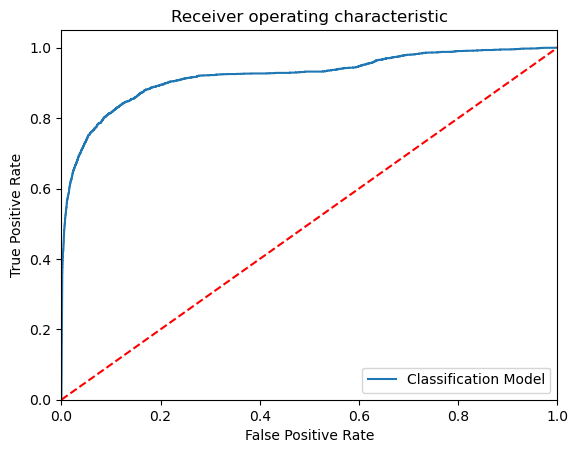

-----------------------------------------------------------------------------------------------------


In [27]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True, 
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, 
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data 

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-------------------------------------------------------------------------------------------------------------

# SVM - Polynomial

Model Name:  SVM - Polynominal
Confusion matrix : 
 [[ 1092  1355]
 [   66 22827]]
Outcome values : 
 1092 1355 66 22827
Classification report : 
               precision    recall  f1-score   support

           1       0.94      0.45      0.61      2447
           0       0.94      1.00      0.97     22893

    accuracy                           0.94     25340
   macro avg       0.94      0.72      0.79     25340
weighted avg       0.94      0.94      0.93     25340

Accuracy : 94.4 %
Precision : 94.3 %
Recall : 44.6 %
F1 Score : 0.606
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 72.2 %
MCC : 0.627
roc_auc_score: 0.722


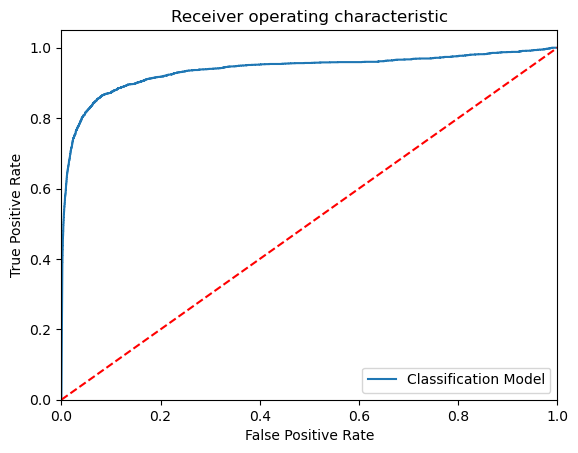

-----------------------------------------------------------------------------------------------------


In [28]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model with train data

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Polynominal",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------

# SVM - Sigmoid Kernel

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[ 1205  1242]
 [ 8133 14760]]
Outcome values : 
 1205 1242 8133 14760
Classification report : 
               precision    recall  f1-score   support

           1       0.13      0.49      0.20      2447
           0       0.92      0.64      0.76     22893

    accuracy                           0.63     25340
   macro avg       0.53      0.57      0.48     25340
weighted avg       0.85      0.63      0.71     25340

Accuracy : 63.0 %
Precision : 12.9 %
Recall : 49.2 %
F1 Score : 0.204
Specificity or True Negative Rate : 64.5 %
Balanced Accuracy : 56.8 %
MCC : 0.084
roc_auc_score: 0.569


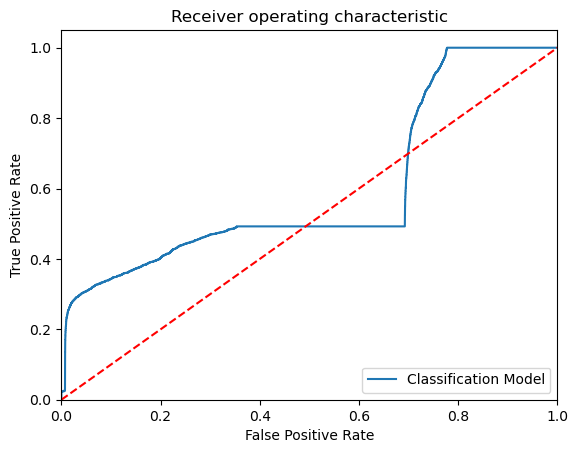

-----------------------------------------------------------------------------------------------------


In [29]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model with train data

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name
    
print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

# SVM -  Gaussian

Model Name:  SVM - Gaussian
Confusion matrix : 
 [[ 1490   957]
 [  683 22210]]
Outcome values : 
 1490 957 683 22210
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.61      0.65      2447
           0       0.96      0.97      0.96     22893

    accuracy                           0.94     25340
   macro avg       0.82      0.79      0.80     25340
weighted avg       0.93      0.94      0.93     25340

Accuracy : 93.5 %
Precision : 68.6 %
Recall : 60.9 %
F1 Score : 0.645
Specificity or True Negative Rate : 97.0 %
Balanced Accuracy : 79.0 %
MCC : 0.611
roc_auc_score: 0.79


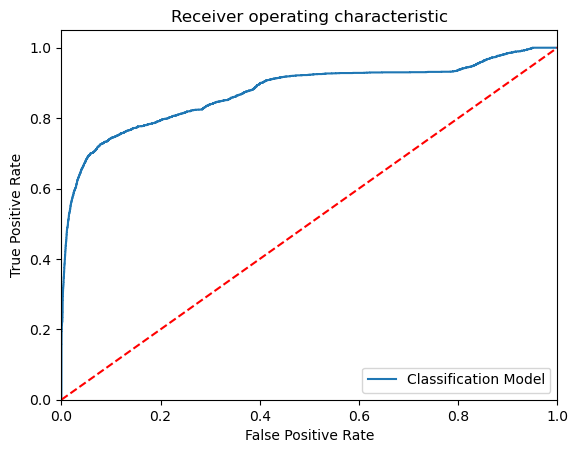

-----------------------------------------------------------------------------------------------------


In [30]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model with train data

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name
    
print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show() 
print('-----------------------------------------------------------------------------------------------------')
#---
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp, 
            'False_Negative' : fn, 
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
EMResults1 = EMResults1.append(new_row, ignore_index=True)
#---------------------------------------------------------------------------------------------------------------

In [31]:
EMResults1.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,720,1727,27,22866,0.931,0.964,0.294,0.451,0.999,0.512,0.646529,0.646
1,SVM - Polynominal,1092,1355,66,22827,0.944,0.943,0.446,0.606,0.997,0.627,0.721689,0.722
2,SVM - Sigmoid,1205,1242,8133,14760,0.630,0.129,0.492,0.204,0.645,0.084,0.568589,0.568
3,SVM - Gaussian,1490,957,683,22210,0.935,0.686,0.609,0.645,0.970,0.611,0.789537,0.790


# Compare The Classification Algorithms

In [32]:
#Load the dataset

EMResults = pd.read_csv(r"/Users/killamsettysuneel/Desktop/internship/EMResults.csv",header=0)

#Display first 5 Records

EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[  619  1828]
 [  104 22789]]
Outcome values : 
 619 1828 104 22789
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.25      0.39      2447
           0       0.93      1.00      0.96     22893

    accuracy                           0.92     25340
   macro avg       0.89      0.62      0.67     25340
weighted avg       0.92      0.92      0.90     25340

Accuracy : 92.4 %
Precision : 85.6 %
Recall : 25.3 %
F1 Score : 0.391
Specificity or True Negative Rate : 99.5 %
Balanced Accuracy : 62.4 %
MCC : 0.441
roc_auc_score: 0.624


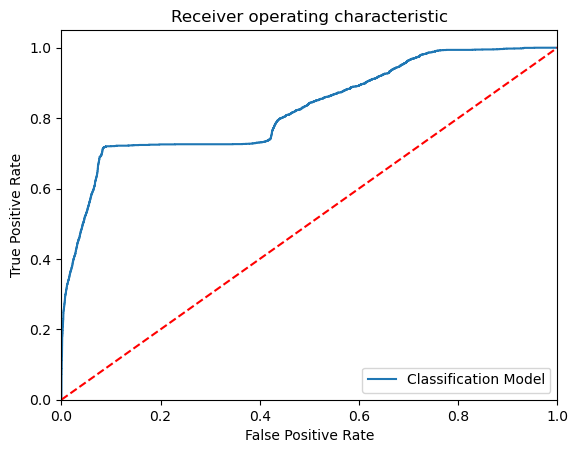

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 1269  1178]
 [   72 22821]]
Outcome values : 
 1269 1178 72 22821
Classification report : 
               precision    recall  f1-score   support

           1       0.95      0.52      0.67      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.95      0.76      0.82     25340
weighted avg       0.95      0.95      0.94     25340

Accuracy : 95.1 %
Precision : 94.6 %
Recall : 51.9 %
F1 Score : 0.67
Specificity or True Negative Rate : 99.7 %
Balanced Accuracy : 75.8 %
MCC : 0.68
roc_auc_score: 0.758


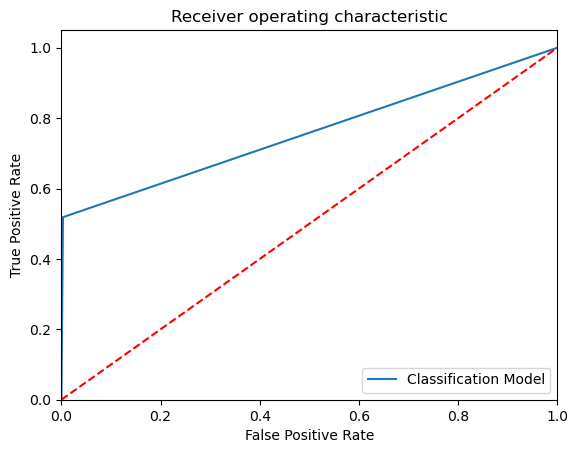

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[ 1896   551]
 [   13 22880]]
Outcome values : 
 1896 551 13 22880
Classification report : 
               precision    recall  f1-score   support

           1       0.99      0.77      0.87      2447
           0       0.98      1.00      0.99     22893

    accuracy                           0.98     25340
   macro avg       0.98      0.89      0.93     25340
weighted avg       0.98      0.98      0.98     25340

Accuracy : 97.8 %
Precision : 99.3 %
Recall : 77.5 %
F1 Score : 0.871
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 88.7 %
MCC : 0.866
roc_auc_score: 0.887


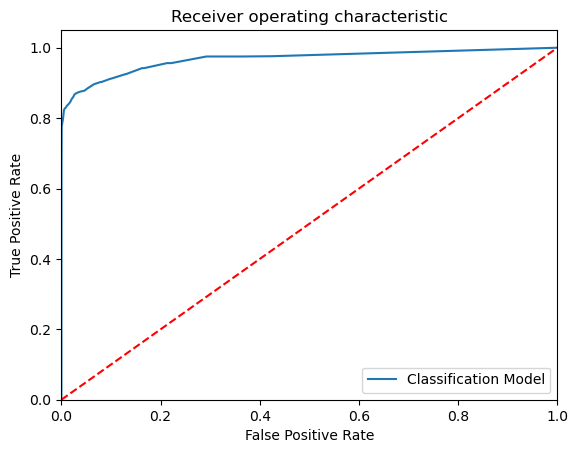

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[ 1806   641]
 [   33 22860]]
Outcome values : 
 1806 641 33 22860
Classification report : 
               precision    recall  f1-score   support

           1       0.98      0.74      0.84      2447
           0       0.97      1.00      0.99     22893

    accuracy                           0.97     25340
   macro avg       0.98      0.87      0.91     25340
weighted avg       0.97      0.97      0.97     25340

Accuracy : 97.3 %
Precision : 98.2 %
Recall : 73.8 %
F1 Score : 0.843
Specificity or True Negative Rate : 99.9 %
Balanced Accuracy : 86.8 %
MCC : 0.839
roc_auc_score: 0.868


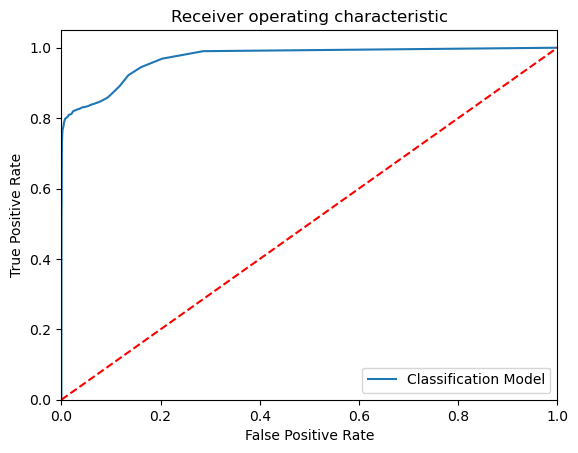

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[ 1347  1100]
 [   96 22797]]
Outcome values : 
 1347 1100 96 22797
Classification report : 
               precision    recall  f1-score   support

           1       0.93      0.55      0.69      2447
           0       0.95      1.00      0.97     22893

    accuracy                           0.95     25340
   macro avg       0.94      0.77      0.83     25340
weighted avg       0.95      0.95      0.95     25340

Accuracy : 95.3 %
Precision : 93.3 %
Recall : 55.0 %
F1 Score : 0.693
Specificity or True Negative Rate : 99.6 %
Balanced Accuracy : 77.3 %
MCC : 0.696
roc_auc_score: 0.773


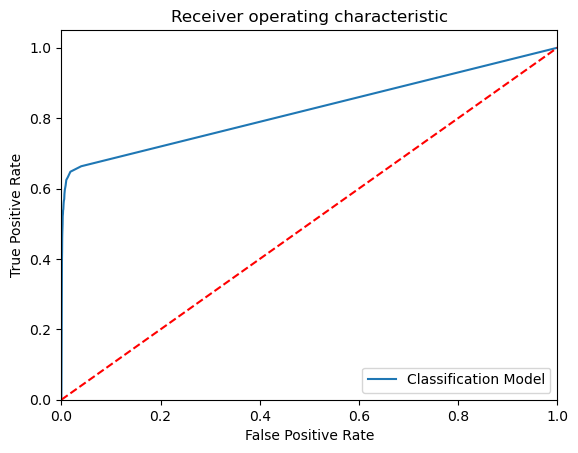

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', probability=True, random_state=42)
Confusion matrix : 
 [[ 1490   957]
 [  683 22210]]
Outcome values : 
 1490 957 683 22210
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.61      0.65      2447
           0       0.96      0.97      0.96     22893

    accuracy                           0.94     25340
   macro avg       0.82      0.79      0.80     25340
weighted avg       0.93      0.94      0.93     25340

Accuracy : 93.5 %
Precision : 68.6 %
Recall : 60.9 %
F1 Score : 0.645
Specificity or True Negative Rate : 97.0 %
Balanced Accuracy : 79.0 %
MCC : 0.611
roc_auc_score: 0.79


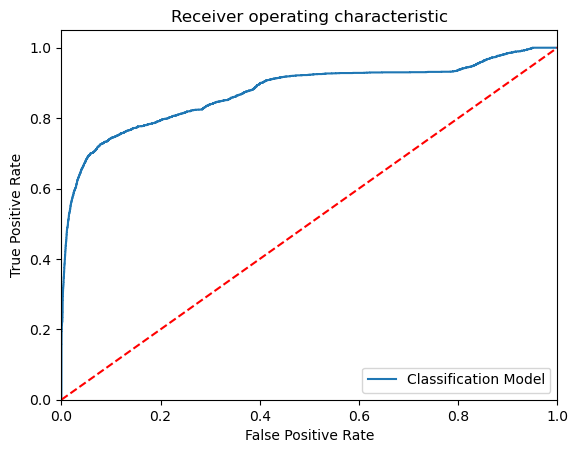

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[ 1069  1378]
 [ 1151 21742]]
Outcome values : 
 1069 1378 1151 21742
Classification report : 
               precision    recall  f1-score   support

           1       0.48      0.44      0.46      2447
           0       0.94      0.95      0.95     22893

    accuracy                           0.90     25340
   macro avg       0.71      0.69      0.70     25340
weighted avg       0.90      0.90      0.90     25340

Accuracy : 90.0 %
Precision : 48.2 %
Recall : 43.7 %
F1 Score : 0.458
Specificity or True Negative Rate : 95.0 %
Balanced Accuracy : 69.4 %
MCC : 0.404
roc_auc_score: 0.693


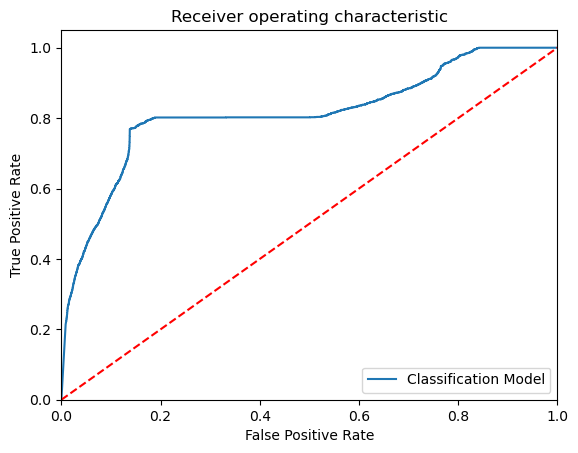

-----------------------------------------------------------------------------------------------------


In [33]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=20)
ModelSVM = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)
ModelGNB = GaussianNB()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelSVM, ModelGNB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive' : tp, 
               'False_Negative' : fn, 
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------

In [34]:
EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),619,1828,104,22789,0.924,0.856,0.253,0.391,0.995,0.441,0.624210,0.624
1,DecisionTreeClassifier(),1269,1178,72,22821,0.951,0.946,0.519,0.670,0.997,0.680,0.757725,0.758
2,"(DecisionTreeClassifier(max_features='sqrt', r...",1896,551,13,22880,0.978,0.993,0.775,0.871,0.999,0.866,0.887129,0.887
3,"(ExtraTreeClassifier(random_state=903225815), ...",1806,641,33,22860,0.973,0.982,0.738,0.843,0.999,0.839,0.868303,0.868
4,KNeighborsClassifier(n_neighbors=20),1347,1100,96,22797,0.953,0.933,0.550,0.693,0.996,0.696,0.773138,0.773
5,"SVC(class_weight='balanced', probability=True,...",1490,957,683,22210,0.935,0.686,0.609,0.645,0.970,0.611,0.789537,0.790
6,GaussianNB(),1069,1378,1151,21742,0.900,0.482,0.437,0.458,0.950,0.404,0.693292,0.694


In [35]:
# Predict the values with KNN algorithms

y_pred = ModelRF.predict(x_test)

In [36]:
# Display the Final results 

Results = pd.DataFrame({'isFraud_A':y_test, 'isFraud_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = OPFD_Data_BK.merge(Results, left_index=True, right_index=True)

# Display 10 records randomly

ResultsFinal.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,isFraud_A,isFraud_P
4166582,304,CASH_IN,15891.68,C823769291,21343510.53,21359402.21,C1666750735,431764.28,415872.60,0,0,0,0
1439263,140,CASH_OUT,122706.09,C1059397257,100663.00,0.00,C1727940360,1501714.65,1624420.74,0,0,0,0
2684253,210,CASH_IN,173613.86,C730466309,1092585.33,1266199.19,C1359420715,367370.57,193756.71,0,0,0,0
2117660,183,PAYMENT,22931.68,C1758526875,251502.09,228570.41,M405550929,0.00,0.00,0,0,0,0
5163558,358,CASH_IN,4191.33,C1184390929,27593353.69,27597545.02,C461903651,835056.41,830865.09,0,0,0,0
